In [1]:
import sys
print(sys.executable)
print(sys.prefix)

g:\iNeuron-Restaurant Rating Prediction\venv\python.exe
g:\iNeuron-Restaurant Rating Prediction\venv


# Restaurant Rating Prediction

## PROBLEM STATEMENT

- The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on
the Zomato Dataset and build an appropriate Machine Learning Model that will help
various Zomato Restaurants to predict their respective Ratings based on certain
features.

## DATASET INFORMATION

- The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment
of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru
being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world.

- The recorded data for each restaurant and each category was read and data for each restaurant was scraped individually. 15 variables were scraped in this phase. For each of the neighborhood and for each category their online_order, book_table, rate, votes, phone, location, rest_type, dish_liked, cuisines, approx_cost(for two people), reviews_list, menu_item was extracted. See section 5 for more details about the variables.

## Attributes Description

1. __url__: The web address or link to the restaurant's Zomato page.

2. __address__: The physical address of the restaurant. 

3. __name__: The name of the restaurant. 

4. __online_order__: Indicates whether the restaurant offers online ordering (Yes/No). 

5. __book_table__: Indicates whether the restaurant offers table booking (Yes/No). 

6. __rate__: The rating of the restaurant. It represents the average rating given by customers, typically on a scale from 1 to 5.

7. __votes__: The number of votes or reviews the restaurant has received. 

8. __phone__: The contact number of the restaurant. 

9. __location__: The locality or area where the restaurant is situated. 

10 __rest_type__: The type of restaurant (e.g., casual dining, café, quick bites).

11. __dish_liked__: Popular dishes at the restaurant.

12. __cuisines__: The types of cuisines offered by the restaurant (e.g., Italian, Chinese, Indian). 

13. __approx_cost(for two people)__: The approximate cost for two people to dine at the restaurant.

14. __reviews_list__: A list of reviews given by customers. 

15. __menu_item__: Items available on the restaurant's menu.

16. __listed_in(type)__: The category or type under which the restaurant is listed on Zomato (e.g., Delivery, Dine-out). 

17. __listed_in(city)__: The city in which the restaurant is located. 

In [2]:
#importing necessary Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/zomato.csv')

In [4]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.shape

(51717, 17)

### Data Cleaning

In [7]:
#dropping irrelavent features
df = df.drop(columns=['url','address','phone','dish_liked','menu_item','reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
df.shape

(51717, 11)

In [9]:
#checking for null values
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [11]:
#dropping duplicates
df.drop_duplicates(inplace=True)
df.shape

(51609, 11)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51609 non-null  object
 1   online_order                 51609 non-null  object
 2   book_table                   51609 non-null  object
 3   rate                         43854 non-null  object
 4   votes                        51609 non-null  int64 
 5   location                     51588 non-null  object
 6   rest_type                    51382 non-null  object
 7   cuisines                     51564 non-null  object
 8   approx_cost(for two people)  51265 non-null  object
 9   listed_in(type)              51609 non-null  object
 10  listed_in(city)              51609 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.7+ MB


In [13]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [14]:
#creating a function for cleaning 
def handlerate(column):
    if (column=='NEW' or column=='-'):
        return np.nan
    else:
        column = str(column).split('/')
        column= column[0]
        return float(column)
    

df.rate = df.rate.apply(handlerate)
df.rate.unique()


array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, nan, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [15]:
df['rate'].isnull().sum()

10019

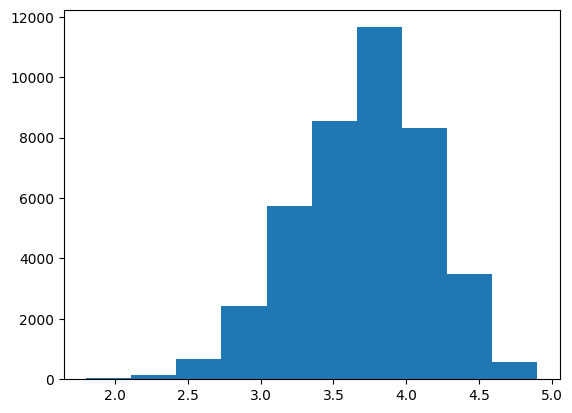

In [16]:
#plotting the graph "df['rate']"

plt.hist(df['rate']);

In [17]:
#imputing value with mean 
df['rate'].fillna(df['rate'].mean() ,inplace=True)
df['rate'].isnull().sum()

0

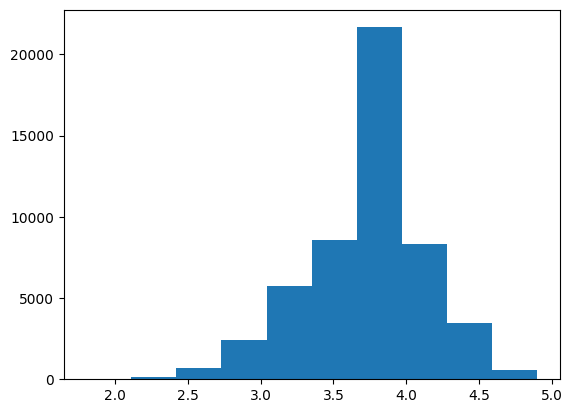

In [18]:
plt.hist(df['rate']);

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [20]:
df['listed_in(city)'].nunique()

30

In [21]:
#dropping all the null values
df.dropna(inplace=True)
df.shape

(51042, 11)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51042 non-null  object 
 1   online_order                 51042 non-null  object 
 2   book_table                   51042 non-null  object 
 3   rate                         51042 non-null  float64
 4   votes                        51042 non-null  int64  
 5   location                     51042 non-null  object 
 6   rest_type                    51042 non-null  object 
 7   cuisines                     51042 non-null  object 
 8   approx_cost(for two people)  51042 non-null  object 
 9   listed_in(type)              51042 non-null  object 
 10  listed_in(city)              51042 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [23]:
df.rename({'approx_cost(for two people)':'cost2plates' , 'listed_in(type)':'type'},axis=1,inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [24]:
#dropping listed_in(city) column because we have location
df = df.drop(columns=['listed_in(city)'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


In [25]:
df['cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [26]:
#creating a func for handling cost2plates column
def handlecost2plates(column):
    column = str(column)
    if ',' in column:
        column = column.replace(',','')
        return float(column)
    else:
        return float(column)
    
df['cost2plates'] = df['cost2plates'].apply(handlecost2plates)
df['cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [27]:
df['rest_type'].nunique()

93

In [28]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [29]:
#since rest_type have soo many value so we merge small values in others category
rest_types = df['rest_type'].value_counts(ascending=False)
rest_types

rest_type
Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [30]:
rest_typeslessthan_1000 = rest_types[rest_types<1000]
rest_typeslessthan_1000

rest_type
Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 85, dtype: int64

In [31]:
#creating a func
def handle_rest(value):
    if(value in rest_typeslessthan_1000):
        return 'others'
    else:
        return value
    
df['rest_type']=df['rest_type'].apply(handle_rest)
df['rest_type'].value_counts()

rest_type
Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: count, dtype: int64

In [32]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51042 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51042 non-null  object 
 1   online_order  51042 non-null  object 
 2   book_table    51042 non-null  object 
 3   rate          51042 non-null  float64
 4   votes         51042 non-null  int64  
 5   location      51042 non-null  object 
 6   rest_type     51042 non-null  object 
 7   cuisines      51042 non-null  object 
 8   cost2plates   51042 non-null  float64
 9   type          51042 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 4.3+ MB


In [35]:
df['location'].value_counts()

location
BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: count, Length: 93, dtype: int64

In [36]:
loc = df['location'].value_counts(ascending=False)
loc_lessthan300 = loc[loc<300]

#creating a func:
def handle_loc(value):
    if value in loc_lessthan300:
        return 'others'
    else:
        return value
    
df['location'] = df['location'].apply(handle_loc)
df['location'].value_counts()

location
BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
L

In [37]:
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'others', 'Jayanagar', 'JP Nagar',
       'Bannerghatta Road', 'BTM', 'Electronic City', 'HSR',
       'Marathahalli', 'Shanti Nagar', 'Koramangala 5th Block',
       'Richmond Road', 'Koramangala 7th Block', 'Koramangala 4th Block',
       'Bellandur', 'Sarjapur Road', 'Whitefield', 'Old Airport Road',
       'Indiranagar', 'Koramangala 1st Block', 'Frazer Town', 'MG Road',
       'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor',
       'Residency Road', 'Shivajinagar', 'St. Marks Road',
       'Cunningham Road', 'Commercial Street', 'Domlur', 'Ejipura',
       'Malleshwaram', 'Kammanahalli', 'Koramangala 6th Block',
       'Brookefield', 'Rajajinagar', 'Banaswadi', 'Kalyan Nagar',
       'New BEL Road'], dtype=object)

In [38]:
cui = df['cuisines'].value_counts(ascending=False)
cui_lessthan100 = cui[cui<100]

#creating a func
def handle_cui(value):
    if value in cui_lessthan100:
        return 'others'
    else:
        return value
    
df['cuisines'] = df['cuisines'].apply(handle_cui)

In [39]:
df['cuisines'].value_counts()

cuisines
others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: count, Length: 70, dtype: int64

In [40]:
df['type'].value_counts()

type
Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: count, dtype: int64

### Exploratory Data Analysis

C:\Users\hp\AppData\Local\Temp\ipykernel_688\817756370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df , x='location' , palette='Set1')


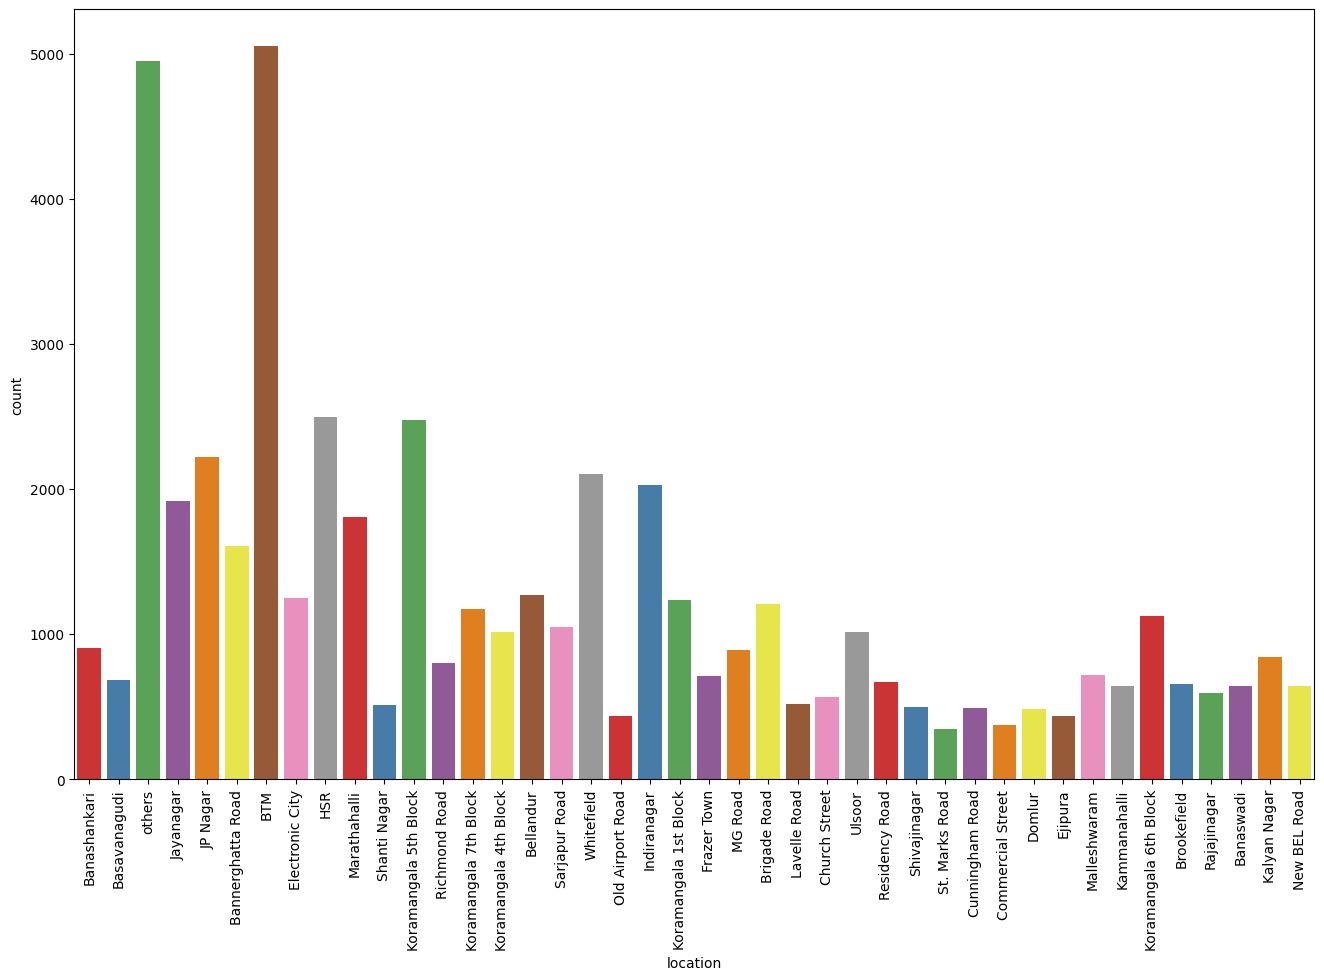

In [44]:
plt.figure(figsize=(16,10))
sns.countplot(data=df , x='location' , palette='Set1')
plt.xticks(rotation=90)
plt.show()

#### Observation
- Most number of peoples are from __"BTM"(Byrasandra, Tavarekere, and Madiwala) location__

C:\Users\hp\AppData\Local\Temp\ipykernel_688\559796922.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df , x='online_order' , palette='bright')


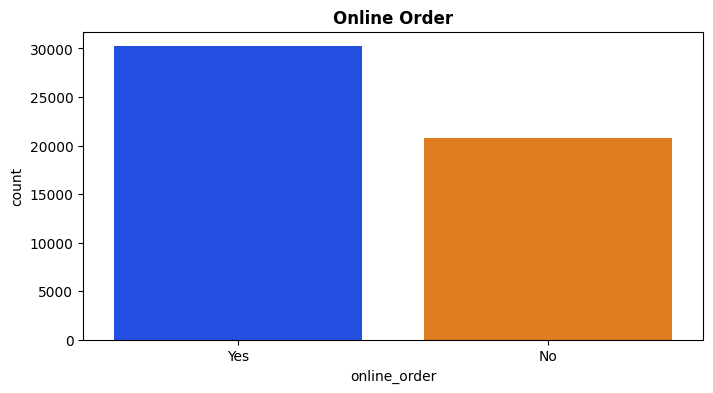

In [50]:
plt.figure(figsize=(8,4))
sns.countplot(data=df , x='online_order' , palette='bright')
plt.title('Online Order' , weight='bold')
plt.show()

#### Observation
- __There are more Home Delivery orders__

C:\Users\hp\AppData\Local\Temp\ipykernel_688\1033101473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df , x='book_table' , palette='bright')


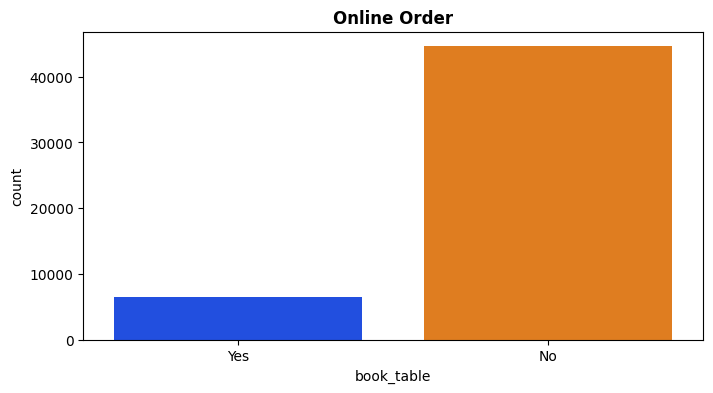

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(data=df , x='book_table' , palette='bright')
plt.title('Online Order' , weight='bold')
plt.show()

#### Observation
- People not to prefer to __Book a Table (may be due to expensiveness...etc)__

C:\Users\hp\AppData\Local\Temp\ipykernel_688\2528436375.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='online_order',data=df,palette='summer')
C:\Users\hp\AppData\Local\Temp\ipykernel_688\2528436375.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='book_table',data=df,palette='summer')


Text(0.5, 1.0, 'Count the values of the table booking option availability.')

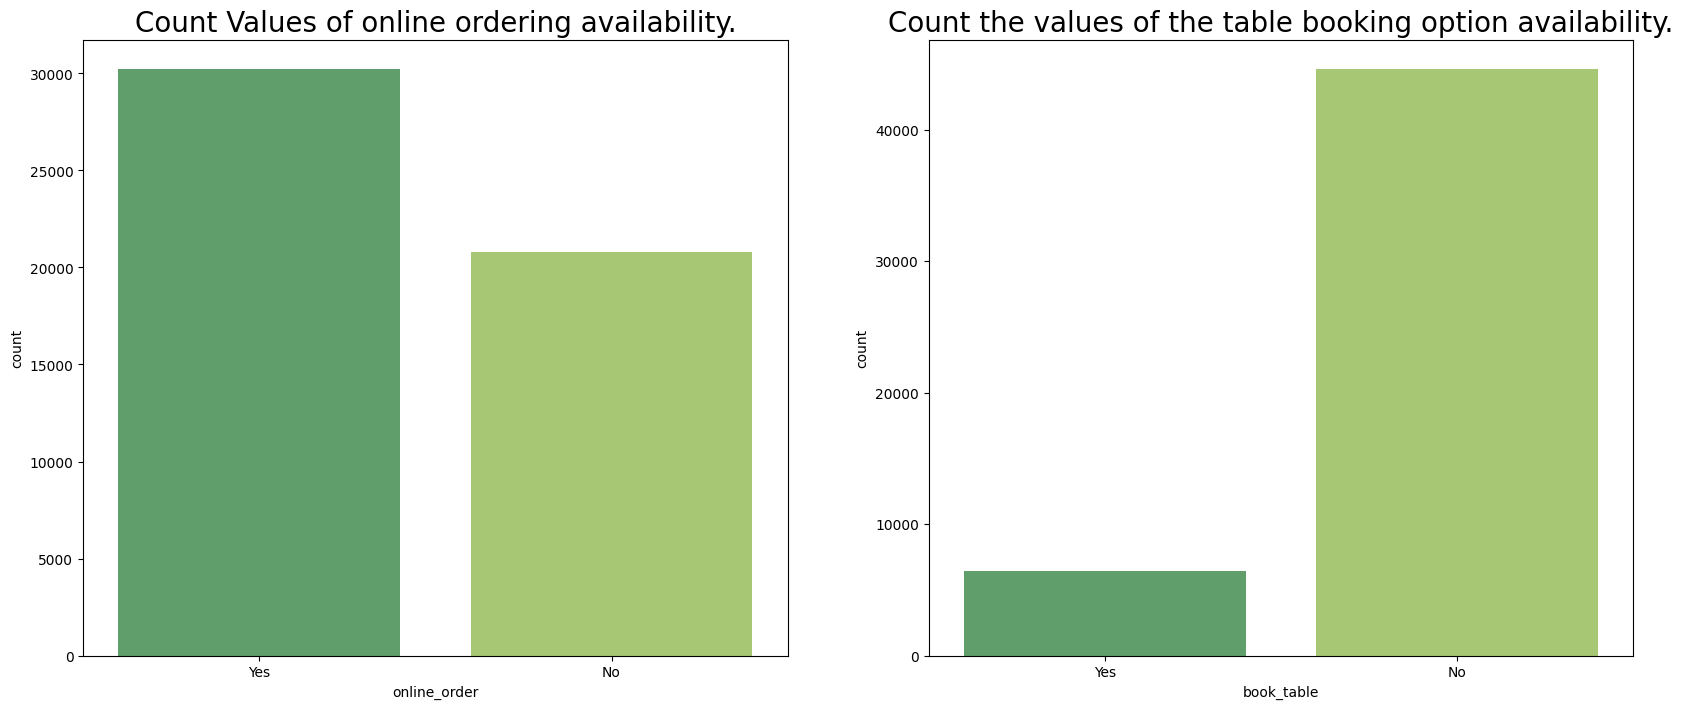

In [56]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.countplot(x='online_order',data=df,palette='summer')
plt.title('Count Values of online ordering availability.',fontsize=20)
plt.subplot(1,2,2)
sns.countplot(x='book_table',data=df,palette='summer')
plt.title('Count the values of the table booking option availability.',fontsize=20)


C:\Users\hp\AppData\Local\Temp\ipykernel_688\2742006796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type',data=df,palette='spring')


Text(0.5, 1.0, 'A List of meal type count values.')

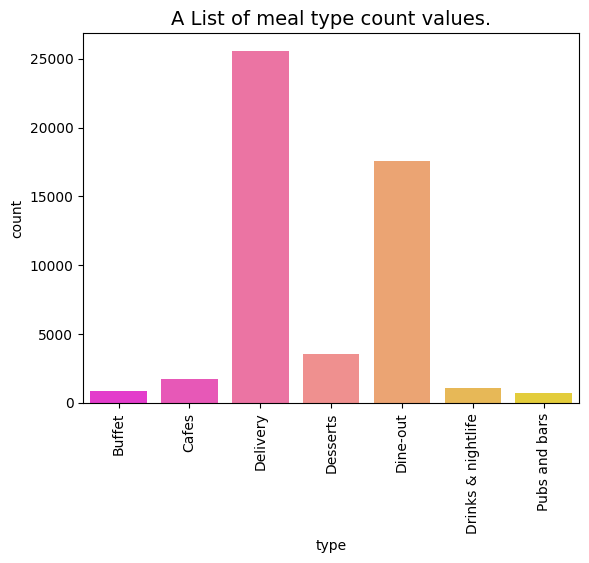

In [61]:
plt.subplot(1,1,1)
sns.countplot(x='type',data=df,palette='spring')
plt.xticks(rotation=90)
plt.title('A List of meal type count values.',fontsize=14)

#### Observation
- __Home Delivery and Dine_out are the most preferrable types__

### Overall Insight:

1. Offers more than __25000 online orders__ for different cuisines by restaurants.

2. There are less than __5000 table booking__ options available through various restaurants.

3. Around __25000 delivery option and around 16000 dine-out__ option offered by various restaurants.

C:\Users\hp\AppData\Local\Temp\ipykernel_688\2864142496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name',y='total_votes',data=data,palette='Paired')


Text(0.5, 1.0, ':Top Five Most Viewed Restaurents In Bengaluru:')

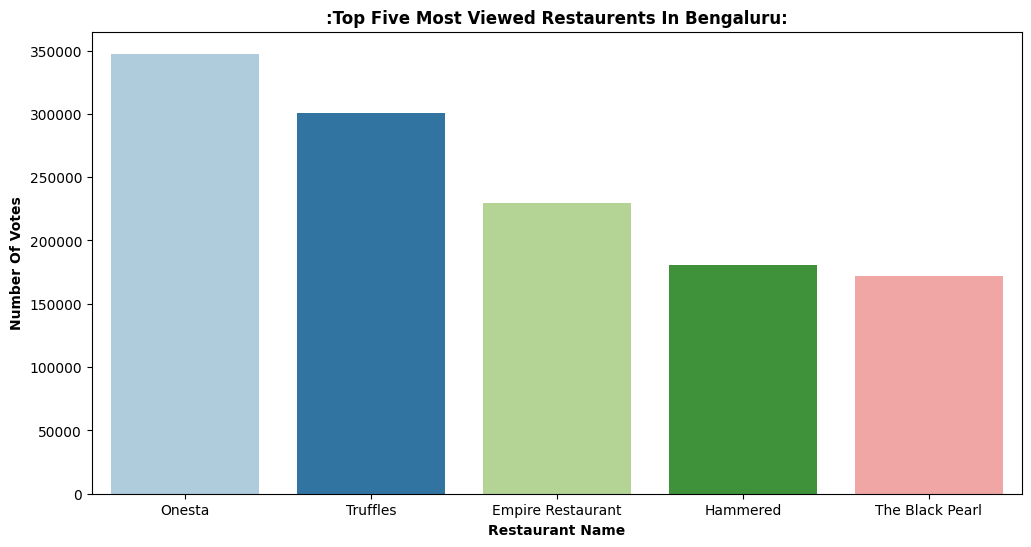

In [67]:
plt.figure(figsize=(12,6))
data = df.groupby(['name'])['votes'].agg({'sum'}).reset_index().rename(columns={'sum':'total_votes'}).sort_values(by='total_votes',ascending=False).head()
sns.barplot(x='name',y='total_votes',data=data,palette='Paired')
plt.xlabel('Restaurant Name' , weight='bold')
plt.ylabel('Number Of Votes' , weight='bold')
plt.title(':Top Five Most Viewed Restaurents In Bengaluru:' , weight='bold')

#### Insight:

- __Onesta Restaurant is placed at the top with around 350000 views, The Black Pearl is placed at 5 with around 170000 views.__

In [68]:
data = df.groupby(['name'])['rate'].mean().reset_index().rename(columns={'rate':'avg_rating'}).sort_values(by='avg_rating',ascending=False)
data

,name,avg_rating
1267,Byg Brewski Brewing Company,4.900000
593,Asia Kitchen By Mainland China,4.900000
6502,SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,4.900000
5882,Punjab Grill,4.871429
859,Belgian Waffle Factory,4.844828
...,...,...
4602,Mamma Mexicana,2.200000
699,Bageecha,2.150000
2097,Decker's Lane,2.100000
2759,Fusion Lounge,2.000000


In [69]:
data['name']= data.name.str.replace('SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© ','')

C:\Users\hp\AppData\Local\Temp\ipykernel_688\1128959679.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name',y='avg_rating',data=data.head(25),palette='spring')


Text(0.5, 1.0, 'Top 25 Restaurants in Bangalore According to Customer Ratings')

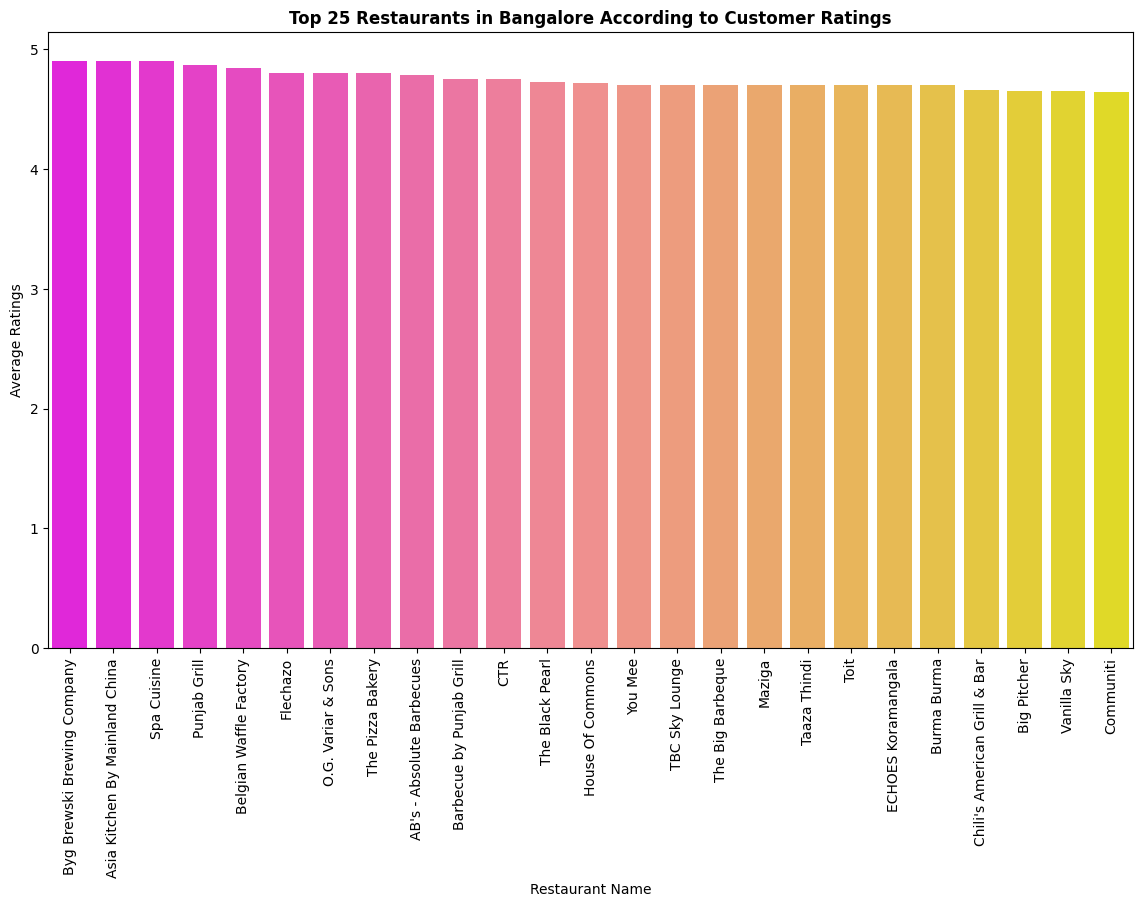

In [76]:
# Top 25 Restaurants in Bangalore According to Customer Ratings
plt.figure(figsize=(14,8))
sns.barplot(x='name',y='avg_rating',data=data.head(25),palette='spring')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Ratings')
plt.tick_params('x',labelrotation=90)
plt.title('Top 25 Restaurants in Bangalore According to Customer Ratings' , weight='bold')

C:\Users\hp\AppData\Local\Temp\ipykernel_688\1612405286.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name',y='avg_rating',data=data.tail(25),palette='winter')


Text(0.5, 1.0, '25 Tail list of Restaurants in Bangalore According to Customer Ratings')

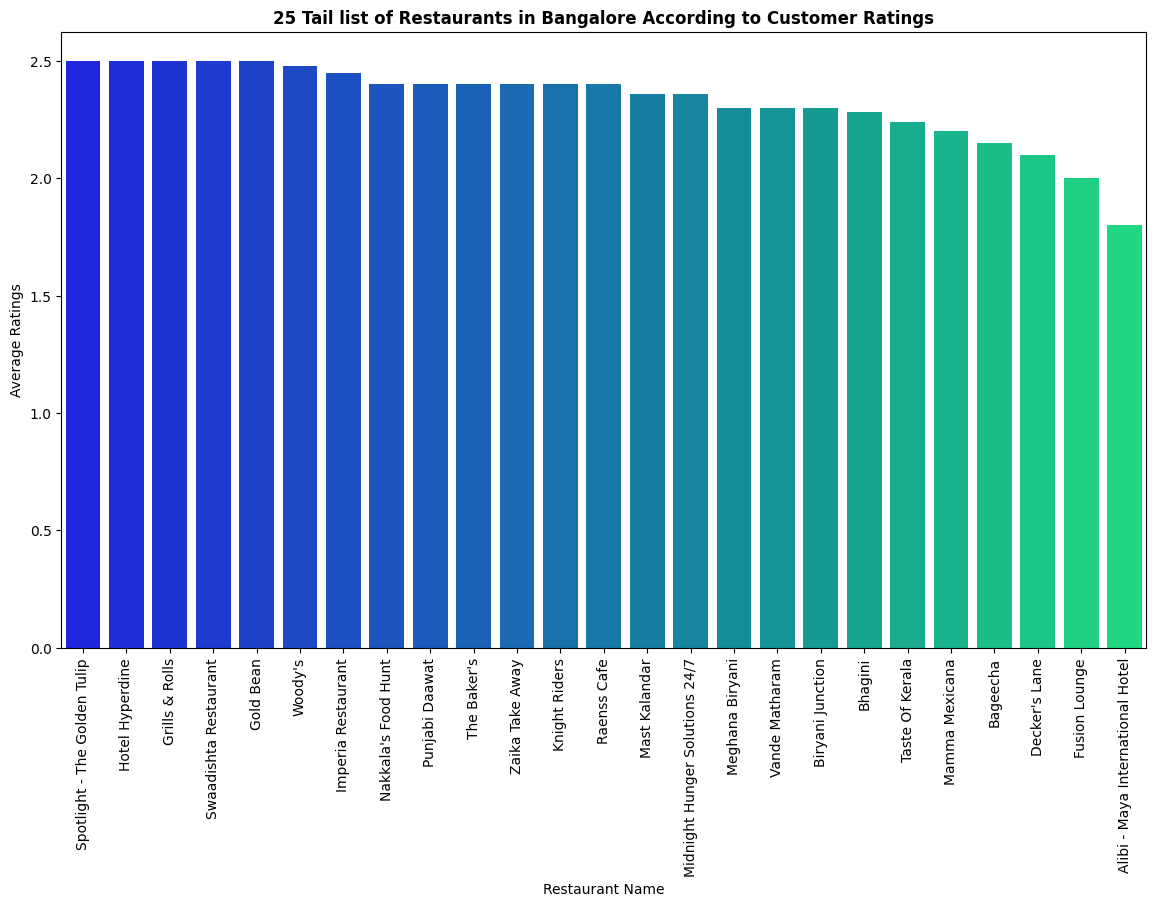

In [75]:
#25 Bottom list of Restaurants in Bangalore According to Customer Ratings
plt.figure(figsize=(14,8))
sns.barplot(x='name',y='avg_rating',data=data.tail(25),palette='winter')
plt.xlabel('Restaurant Name')
plt.ylabel('Average Ratings')
plt.tick_params('x',labelrotation=90)
plt.title('25 Tail list of Restaurants in Bangalore According to Customer Ratings' , weight='bold')

### Insight:

1. __The "Byg Brewski Brewing Company"__ restaurant is at the top with an average rating of __4.9__ points.

2. __Alibi - Maya International Hotel__ Restaurant is placed at the tail edge with almost __1.9__ rating points.(may be Because of low quality food , Poor Service)

In [79]:
data = df.groupby('name')['cost2plates'].mean().reset_index().sort_values(by='cost2plates',ascending=False)
data

,name,cost2plates
4341,Le Cirque Signature - The Leela Palace,6000.0
6216,Royal Afghan - ITC Windsor,5000.0
4594,Malties - Radisson Blu,4500.0
4246,La Brasserie - Le Meridien,4100.0
2032,Dakshin - ITC Windsor,4000.0
...,...,...
5172,Nellore Dosa Camp,70.0
5063,Namaste,70.0
2756,Funky Food,60.0
1174,Bread & Better,50.0


In [83]:
data.head(25)

,name,cost2plates
4341,Le Cirque Signature - The Leela Palace,6000.0
6216,Royal Afghan - ITC Windsor,5000.0
4594,Malties - Radisson Blu,4500.0
4246,La Brasserie - Le Meridien,4100.0
2032,Dakshin - ITC Windsor,4000.0
2406,Edo Restaurant & Bar - ITC Gardenia,4000.0
6161,Riwaz - The Ritz-Carlton,4000.0
4675,Masala Klub - The Taj West End,4000.0
3667,Jamavar - The Leela Palace,4000.0
2944,Grill 99 - The Ritz-Carlton,4000.0


In [86]:
data['name']= data.name.str.replace('b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© ','')

C:\Users\hp\AppData\Local\Temp\ipykernel_688\3137481709.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name',y='cost2plates',data=data.head(25),palette='winter')


Text(0.5, 1.0, 'Top 25 Most Expensive Restaurants in Bengaluru.')

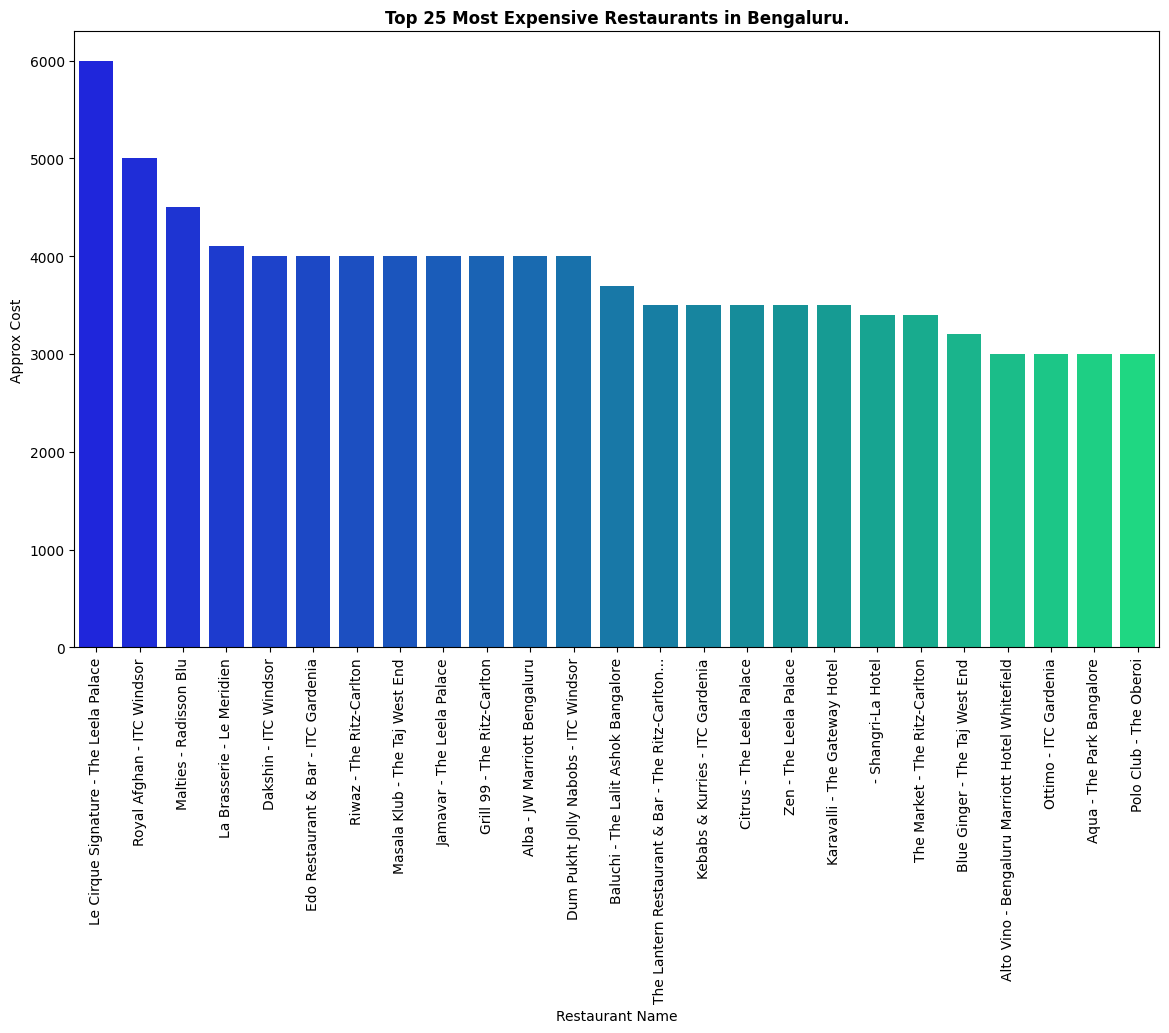

In [87]:
# Top 25 Most Expensive Restaurants in Bengaluru.
plt.figure(figsize=(14,8))
sns.barplot(x='name',y='cost2plates',data=data.head(25),palette='winter')
plt.xlabel('Restaurant Name')
plt.ylabel('Approx Cost')
plt.tick_params('x',labelrotation=90)
plt.title('Top 25 Most Expensive Restaurants in Bengaluru.' , weight='bold')

C:\Users\hp\AppData\Local\Temp\ipykernel_688\1949723168.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name',y='cost2plates',data=data.tail(25),palette='summer')


Text(0.5, 1.0, 'Top 25 least Expensive Restaurants in Bengaluru.')

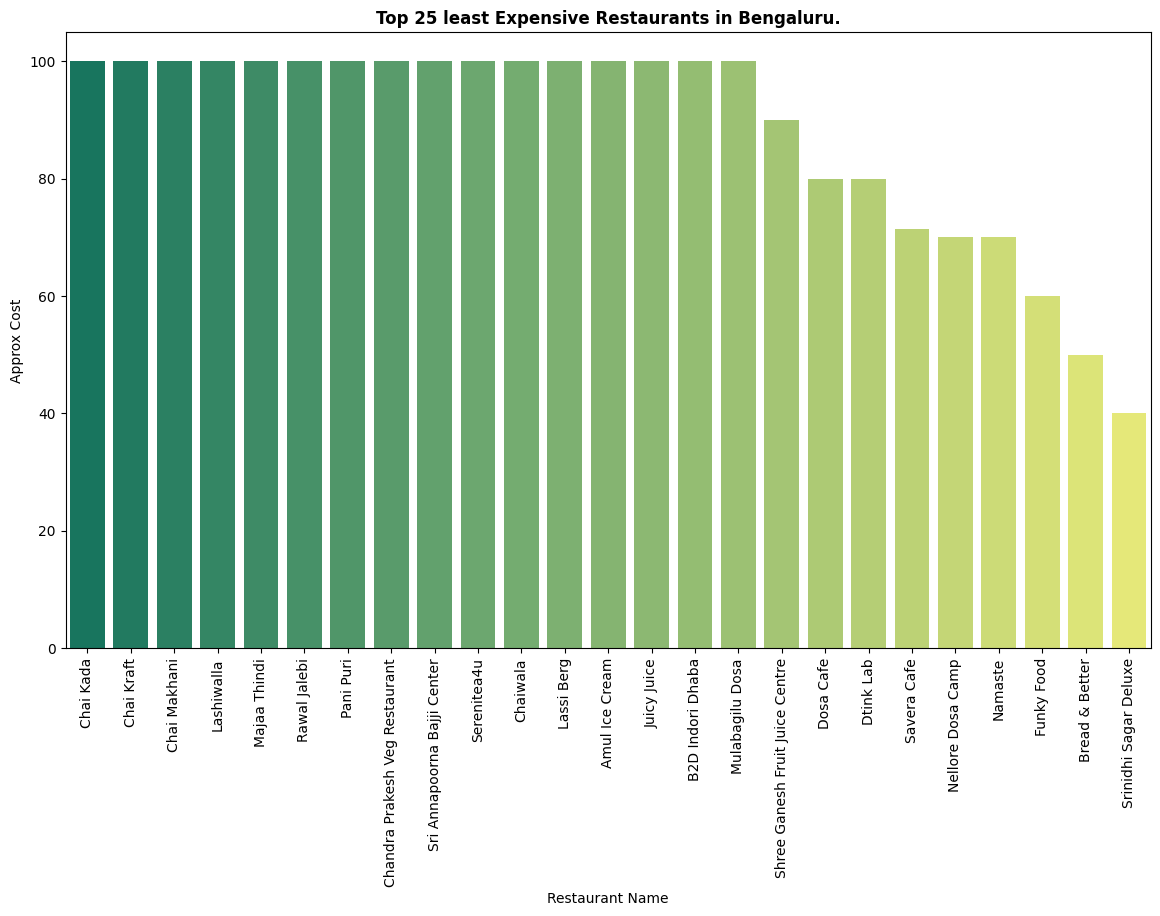

In [88]:
# Top 25 least Expensive Restaurants in Bengaluru.
plt.figure(figsize=(14,8))
sns.barplot(x='name',y='cost2plates',data=data.tail(25),palette='summer')
plt.xlabel('Restaurant Name')
plt.ylabel('Approx Cost')
plt.tick_params('x',labelrotation=90)
plt.title('Top 25 least Expensive Restaurants in Bengaluru.' , weight='bold')

### Insight:

- The __top 25 most expensive restaurants (Le Cirque Signature - The Leela Palace) charge around Rs 6000 for a meal for two__ and the __least expensive restaurant Srinidhi Sagar Deluxe charges only Rs 40 for a meal for two.__


C:\Users\hp\AppData\Local\Temp\ipykernel_688\3428379167.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_popular_cuisine['rate'], kde=True)


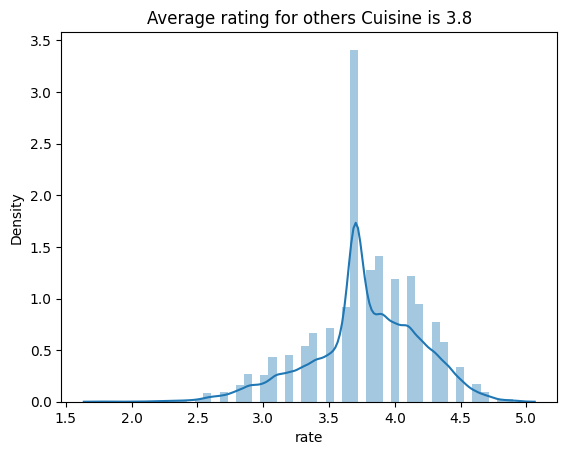

In [89]:
# Find the most popular cuisine 
cuisine_counts = df['cuisines'].value_counts()
most_popular_cuisine = cuisine_counts.index[0]

# Find the average rating
df_popular_cuisine = df[df['cuisines'] == most_popular_cuisine]
average_rating = round(df_popular_cuisine['rate'].mean(),1)

# Visualize the data 
sns.distplot(df_popular_cuisine['rate'], kde=True)
plt.title('Average rating for ' + most_popular_cuisine + ' Cuisine is ' + str(average_rating))
plt.show()

Text(0.5, 1.0, 'Correlation Of The Columns')

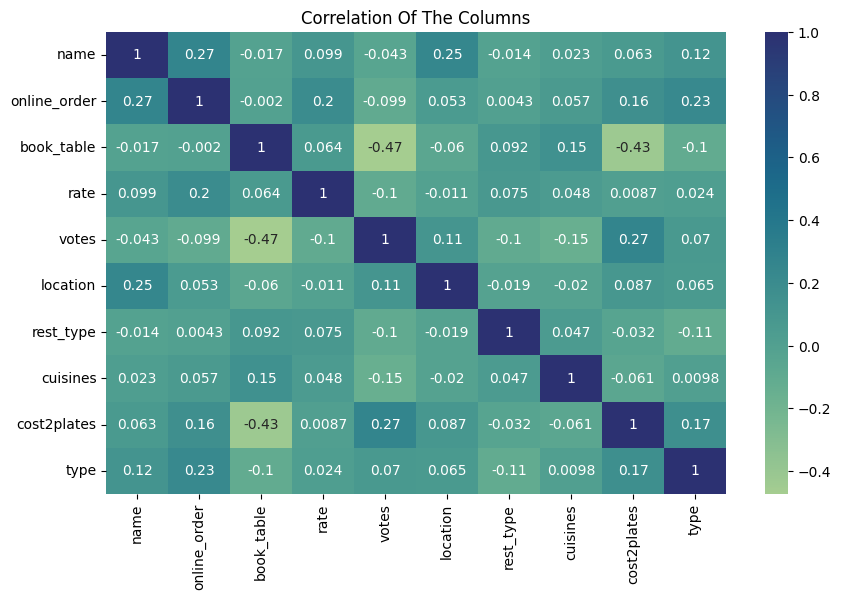

In [92]:
"""Pearson's correlation coefficient is the covariance of the two variables divided by the product of their standard deviations"""
plt.figure(figsize=(10,6))
sns.heatmap(df.apply(lambda x: x.factorize()[0]).corr(method='pearson',),annot=True,cmap='crest')
plt.title("Correlation Of The Columns")

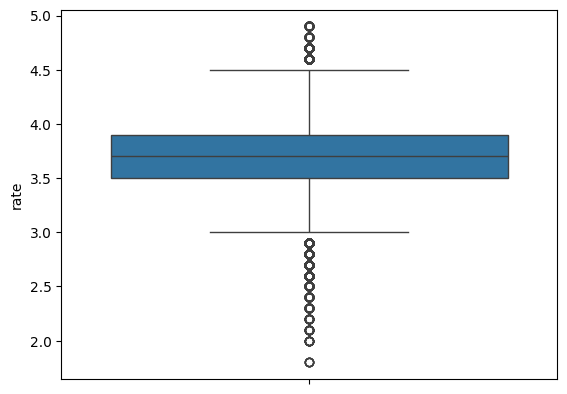

In [93]:
sns.boxplot(df['rate']);

In [94]:
# Calculate the 25th percentile (Q1) and the 75th percentile (Q3)
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper limits for outliers
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

# Output the results
print(f"25th percentile (Q1): {Q1}")
print(f"75th percentile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower limit for outliers: {lower_lim}")
print(f"Upper limit for outliers: {upper_lim}")


25th percentile (Q1): 3.5
75th percentile (Q3): 3.9
Interquartile Range (IQR): 0.3999999999999999
Lower limit for outliers: 2.9000000000000004
Upper limit for outliers: 4.5


In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rate,51042.0,3.701424,0.395197,1.8,3.5,3.700142,3.9,4.9
votes,51042.0,284.507700,805.927478,0.0,7.0,41.000000,199.0,16832.0
cost2plates,51042.0,555.782983,439.293333,40.0,300.0,400.000000,700.0,6000.0


In [96]:
# Calculate the 25th percentile (Q1) and the 75th percentile (Q3)
Q1 = df['votes'].quantile(0.25)
Q3 = df['votes'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Determine the lower and upper limits for outliers
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

# Output the results
print(f"25th percentile (Q1): {Q1}")
print(f"75th percentile (Q3): {Q3}")
print(f"Interquartile Range (IQR): {IQR}")
print(f"Lower limit for outliers: {lower_lim}")
print(f"Upper limit for outliers: {upper_lim}")


25th percentile (Q1): 7.0
75th percentile (Q3): 199.0
Interquartile Range (IQR): 192.0
Lower limit for outliers: -281.0
Upper limit for outliers: 487.0


In [97]:
df['votes'] = np.where(df['votes'] < lower_lim, lower_lim, np.where(df['votes'] > upper_lim, upper_lim, df['votes']))

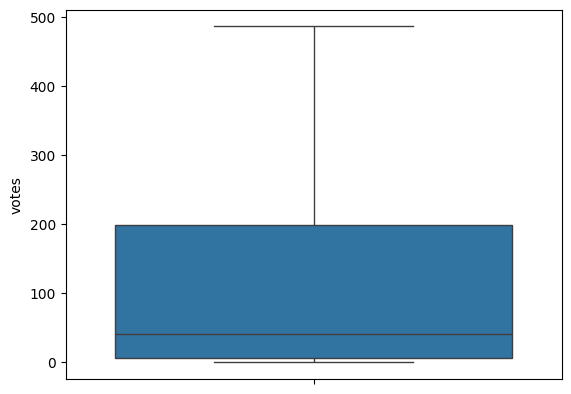

In [98]:
sns.boxplot(df['votes']);

#other techniques for outlier treatment

#1.
#df['votes'] = df['votes'].clip(lower=lower_lim, upper=upper_lim)

#2.
#df.loc[df['votes'] < lower_lim, 'votes'] = lower_lim
#df.loc[df['votes'] > upper_lim, 'votes'] = upper_lim


#3.
#def limit_votes(vote):
    #if vote < lower_lim:
        #return lower_lim
    #elif vote > upper_lim:
        #return upper_lim
    #else:
       #return vote

#df['votes'] = df['votes'].apply(limit_votes)

#4.
#bins = [-np.inf, lower_lim, upper_lim, np.inf]
#labels = [lower_lim, 'within_range', upper_lim]
#df['votes'] = pd.cut(df['votes'], bins=bins, labels=labels, include_lowest=True)
#df['votes'] = df['votes'].replace({'within_range': np.nan}).astype(float).fillna(df['votes'].astype(float))


__Summary__

    1. np.where: Simple and effective for setting outliers to boundary values.
    2.clip(): A concise method for limiting values within a specified range.
    3. Masking and assignment: Explicit and clear method for handling outliers.
    4. Custom function with .apply(): Flexible for more complex outlier handling logic.
    5. pd.cut(): Useful for binning values into intervals, though more complex for simple outlier handling.


In [99]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,type
0,Jalsa,Yes,Yes,4.1,487.0,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Spice Elephant,Yes,No,4.1,487.0,Banashankari,Casual Dining,others,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,487.0,Banashankari,others,others,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,others,600.0,Buffet


In [100]:
df.shape

(51042, 10)

In [101]:
df.to_csv('data/zomato_cleaned.csv' , index=False)